In [59]:
import fastf1 as ff1

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from IPython.display import display, Markdown

YEAR = 2022
RACE = 'Austria'

ff1.Cache.enable_cache('../data/cache')

session = ff1.get_session(YEAR, RACE, 'Race')
session.load(telemetry=True, laps=True, messages=False, weather=False)

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '44', '63', '31', '47', '4', '20', '3', '14', '77', '23', '18', '24', '10', '22', '5', '55', '6', '11']


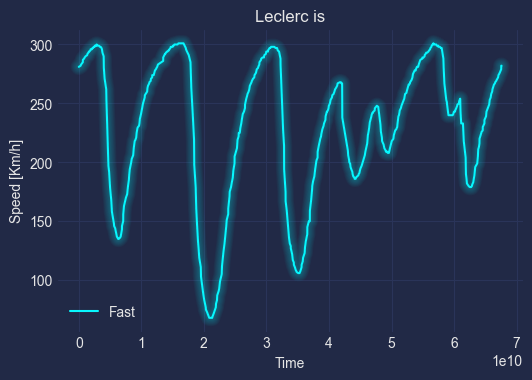

In [39]:
lec = session.laps.pick_driver('LEC').pick_fastest()
t = lec.telemetry['Time']
speed = lec.telemetry['Speed']

fig, ax = plt.subplots(dpi=100)

ax.plot(t, speed, label='Fast')

ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()


mplcyberpunk.make_lines_glow(ax)


### LEC vs. VER - Fastest lap delta

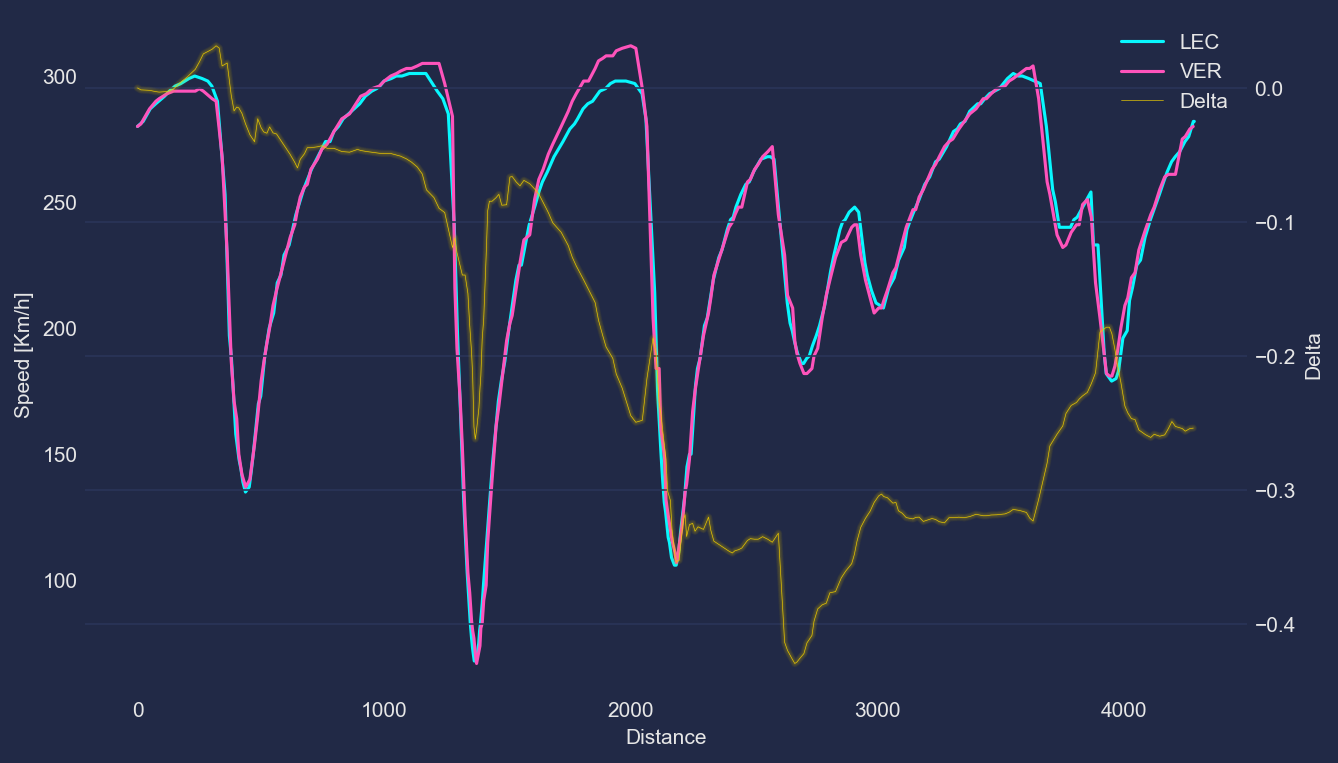

In [41]:
display(Markdown('### LEC vs. VER - Fastest lap delta'))

lec_lap = session.laps.pick_driver('LEC').pick_fastest()
ver_lap = session.laps.pick_driver('VER').pick_fastest()

delta_time, lec_car_data, ver_car_data = ff1.utils.delta_time(lec_lap, ver_lap)

fig, ax = plt.subplots(dpi=150, figsize=(10, 6))

line_1 = ax.plot(lec_car_data['Distance'], lec_car_data['Speed'], label='LEC')
line_2 = ax.plot(ver_car_data['Distance'], ver_car_data['Speed'], label='VER')

twin = ax.twinx()
line_3 = twin.plot(
    ver_car_data['Distance'],
    delta_time,
    label='Delta',
    color='#F5D300',
    lw=0.3,
)

lines = line_1 + line_2 + line_3
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=0)

ax.grid()
ax.set_xlabel("Distance")
ax.set_ylabel("Speed [Km/h]")
twin.set_ylabel("Delta")

mplcyberpunk.make_lines_glow(twin, diff_linewidth=0.35)


## Fastest Lap Gear Shifts

### Austrian Grand Prix 2022

#### VER - Lap 62

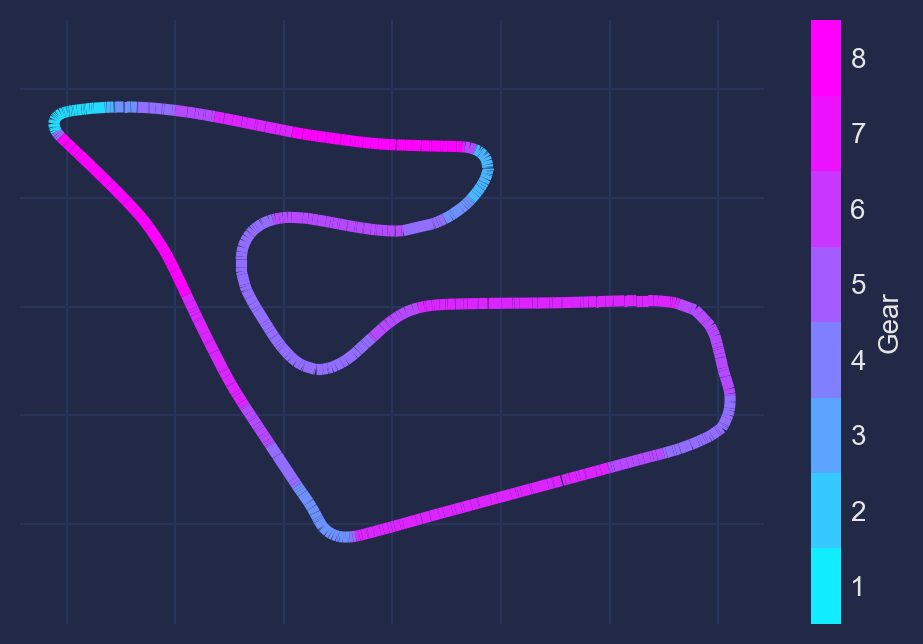

In [124]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

display(Markdown(f"## Fastest Lap Gear Shifts"))
display(Markdown(f"### {session.event['EventName']} {session.event.year}"))
display(Markdown(f"#### {lap['Driver']} - Lap {lap['LapNumber']}"))

fig, ax = plt.subplots(dpi=200)

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

# prepare colors
cmap = mpl.cm.get_cmap('cool')
# display(cmap)
cm_norm = plt.Normalize(1, 8) # normalize the color so that max value gets the "highest color value"
lc_comp = mpl.collections.LineCollection(segments, norm=cm_norm, cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

gca = fig.gca()
gca.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = fig.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


## Fastest Lap DRS

### Austrian Grand Prix 2022

#### VER - Lap 62

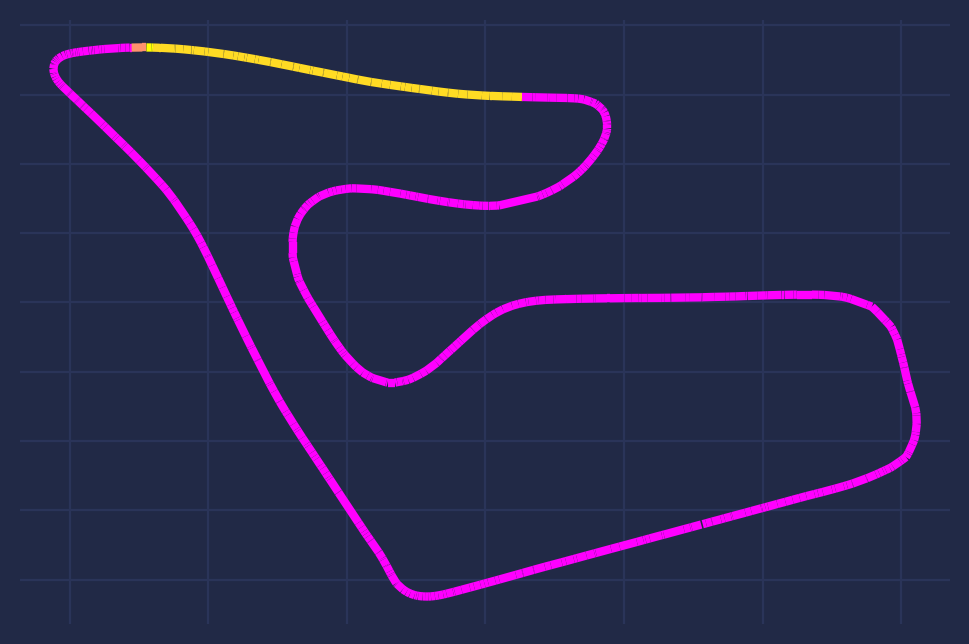

In [142]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

display(Markdown(f"## Fastest Lap DRS"))
display(Markdown(f"### {session.event['EventName']} {session.event.year}"))
display(Markdown(f"#### {lap['Driver']} - Lap {lap['LapNumber']}"))

fig, ax = plt.subplots(dpi=200)

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
drs = tel['DRS'].to_numpy().astype(float)

# prepare colors
cmap = mpl.cm.get_cmap('coolwarm')
# display(cmap)
# normalize the color so that max value gets the "highest color value"
drs_steps = tel['DRS'].unique()
drs_steps.sort()
# display(drs_steps)
cm_norm = plt.Normalize(drs_steps[0], drs_steps[-1])
lc_comp = mpl.collections.LineCollection(segments, norm=cm_norm, cmap=cmap)
lc_comp.set_array(drs)
lc_comp.set_linewidth(3)

gca = fig.gca()
gca.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# cbar = fig.colorbar(mappable=lc_comp, label="Gear",
#                     boundaries=np.arange(drs_steps[0], drs_steps[-1]))
# cbar.set_ticks(np.arange(drs_steps[0] + 0.5, drs_steps[-1] + 0.5))
# cbar.set_ticklabels(['off', 'activated'])
